# Experiment 9: K-Means Clustering on Heart Disease Dataset
This notebook demonstrates K-Means clustering analysis on the Heart Disease dataset from UCI Machine Learning Repository.

### Objectives:
Load and pre-process the Heart Disease dataset
Determine optimal number of clusters using Silhouette score
Reduce dimensionality to 2D using PCA
Visualize clustered data and compare with actual labels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [4]:
# -----------------------------
# a) Load and Preprocess Dataset
# -----------------------------
file_path = "heart.csv"
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "johnsmith88/heart-disease-dataset",
    file_path,
)
# Drop missing values if any
df = df.dropna()

# Remove target column if present (commonly 'target' in Heart dataset)
if 'target' in df.columns:
    X = df.drop('target', axis=1)
else:
    X = df.copy()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\Nirmal Choyal\AppData\Local\Temp\ipykernel_9348\1116578011.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


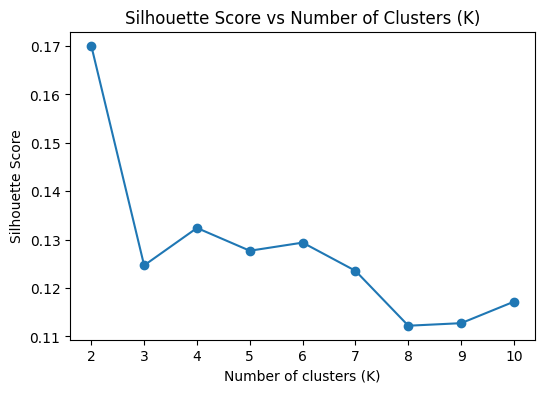

Optimal number of clusters (K): 2


In [5]:
# -----------------------------
# b) Apply K-Means & Determine Optimal K
# -----------------------------
sil_scores = {}
for k in range(2, 11):  # check K from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores[k] = sil

# Plot silhouette scores
plt.figure(figsize=(6, 4))
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker='o')
plt.title("Silhouette Score vs Number of Clusters (K)")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

# Pick best K (highest silhouette)
best_k = max(sil_scores, key=sil_scores.get)
print("Optimal number of clusters (K):", best_k)

# Fit KMeans with best_k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)


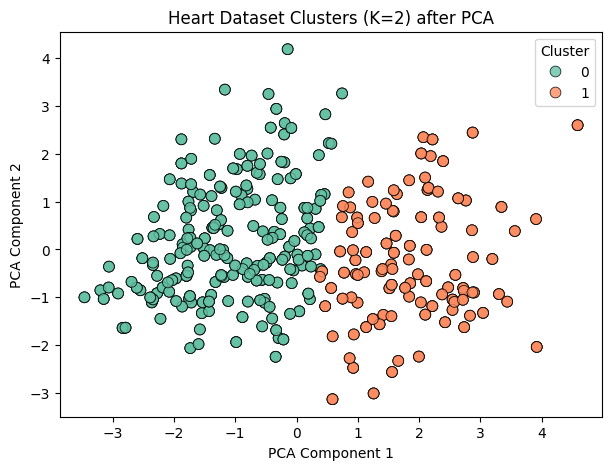

In [6]:
# -----------------------------
# c) Dimensionality Reduction using PCA
# -----------------------------
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# -----------------------------
# d) Visualize the Clusters in 2D
# -----------------------------
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels,
                palette="Set2", s=60, alpha=0.8, edgecolor="k")
plt.title(f"Heart Dataset Clusters (K={best_k}) after PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()